<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [1]:
# 1-1 : 데이터 불러오기
import pandas as pd
excel_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'
df1 = pd.read_excel(io=excel_url, sheet_name = '008770 ')
df2 = pd.read_excel(io=excel_url, sheet_name = '035250')

# 1-2 : 데이터 transpose
df1 = df1.T
df2 = df2.T

# 1-3 : 첫번째 행을 컬럼명들로 변경
df1.columns = df1.iloc[0]
df1 = df1.iloc[1:]
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:]

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요


In [3]:
# 2-1 : 데이터의 dimension 확인
print(df1.shape)
print(df2.shape)
# 2-2-1 : 데이터의 결측치 확인
df1.isnull().sum()
df2.isnull().sum()
# 2-2-2 : 데이터의 결측치 0으로 대체
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [ ]:
# 2-3-1 : 한글폰트 오류 해결
# 나눔 폰트 설치 : 설치후 런타임 - 런타임 다시시작 (Ctrl + M + .)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 라이브러리
import matplotlib as mpl
# 폰트 변환
mpl.rc("font", family='NanumBarunGothic')
# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

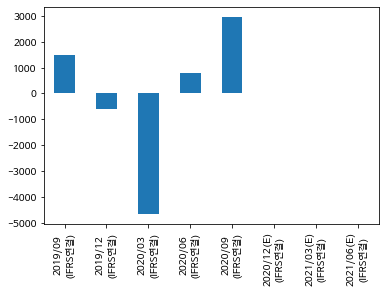

In [14]:
# 2-3-2 : FCF 값 시각화
df1['FCF'].plot.bar()

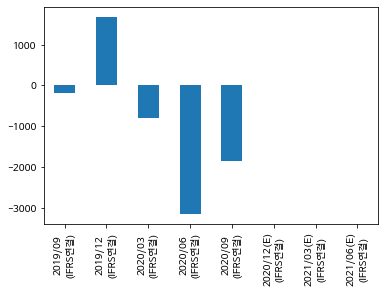

In [15]:
df2['FCF'].plot.bar()

In [26]:
# 2-3-3 : Feature FCF 에서, 0보다 큰 셀 개수의 총합을 num1, 작은 값의 총합을 num2에 저장
# 데이터 필터링
is_bigger_zero = df1['FCF'] > 0
bigger_zero = df1[is_bigger_zero]
num1 = bigger_zero['FCF'].sum()

is_smaller_zero = df1['FCF'] < 0
smaller_zero = df1[is_smaller_zero]
num2 = smaller_zero['FCF'].sum()

is_bigger_zero = df2['FCF'] > 0
bigger_zero = df2[is_bigger_zero]
num1 = bigger_zero['FCF'].sum() + num1

is_smaller_zero = df2['FCF'] < 0
smaller_zero = df2[is_smaller_zero]
num2 = smaller_zero['FCF'].sum() + num2

print(num1, num2)

6941.0 -11263.0


## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [28]:
df1.to_csv('df1.csv', header = False, index = False)
df2.to_csv('df2.csv', header = False, index = False)

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [29]:
a = 1234
b = 5678

a+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [32]:
import seaborn as sns

pp = sns.load_dataset('penguins')

In [38]:
df3 = pd.crosstab(pp.species,pp.sex)
num3 = df3.max()
num4 = df3.min()

## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다